In [1]:
# Blood, Urine, Respiratory sample, wound+ Pus, stool, 
# location
# IP
# OP
# IP less than 24 hours (ER)
# IP < 72 hrs
# IP > 72 hrs


In [10]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

In [63]:
data2 = pd.read_excel('D:/Projects/Apollo/antibiotics/Antibiotic-Validation-main/Antibiotic-Validation-main/new_pred_2.xlsx')
data2.head()

,Unnamed: 0,Sheet Name,AGE,GENDER,PATIENTSERVICE,SPECIMENNAME,Organismname,No of Days from Admission,GROWTH_OBSERVED,antibiotic,Value,IP-OP,Org_pred_1,Org_pred_2,Org_pred_3,Org_prob_1,Org_prob_2,Org_prob_3,Accuracy
0,4,Bangalore,25,MALE,IP,Tissue,Nocardia Species,18,Moderate,Imipenem,1.0,IP,Staphylococcus aureus,NaN,NaN,1.0,0.0,0.0,0
1,5,Bangalore,25,MALE,IP,Tissue,Nocardia Species,18,Moderate,Levofloxacin,1.0,Both,Staphylococcus aureus,NaN,NaN,1.0,0.0,0.0,0
2,6,Bangalore,25,MALE,IP,Tissue,Nocardia Species,18,Moderate,Linezolid,1.0,IP,Staphylococcus aureus,NaN,NaN,1.0,0.0,0.0,0
3,7,Bangalore,25,MALE,IP,Tissue,Nocardia Species,18,Moderate,Meropenem,1.0,IP,Staphylococcus aureus,NaN,NaN,1.0,0.0,0.0,0
4,8,Bangalore,84,MALE,IP,Tissue,Citrobacter,7,Heavy Growth,Cefotaxime,1.0,IP,Staphylococcus aureus,NaN,NaN,1.0,0.0,0.0,0


In [68]:
data2.shape

(271357, 19)

In [64]:
data=data2

In [5]:
#data=data[['Sheet Name','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

In [65]:
Counter(data['Sheet Name'])

Counter({'Bangalore': 79875,
         'Bhubaneswar': 37332,
         'Delhi': 37692,
         'Kolkata': 83703,
         'Nashik': 1438,
         'Navi_Mumbai': 31317})

In [66]:
#data=data.loc[:, ~data.columns.isin(['Unnamed: 0'])]
data_tot=data = data[['SPECIMENNAME','IP-OP','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

In [61]:
Counter(data2["PATIENTSERVICE"])

Counter({'IP': 271357})

In [18]:
data_urine = data.loc[data['SPECIMENNAME'] == "Urine"]
data_Blood = data.loc[data['SPECIMENNAME'] == 'Blood']
data_Respiratory = data.loc[(data['SPECIMENNAME'] == 'Sputum') | (data['SPECIMENNAME'] == 'Throat Swab') | (data['SPECIMENNAME'] =='Tracheal Secretion') | (data['SPECIMENNAME'] =='BAL')]
data_Wound_Pus = data.loc[(data['SPECIMENNAME'] == 'Wound Swab') | (data['SPECIMENNAME'] =='Pus')]
data_stool = data.loc[data['SPECIMENNAME'] == 'Stool']
data_Body_fluid = data.loc[data['SPECIMENNAME'] == 'Ascitic Fluid']

In [19]:
speci_li = []
cosi_li = []
# data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
# data2

# data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
# data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()

#del data_urine['SPECIMENNAME']
#print(data_urine['Org_pred_2'])
#print(le_or.fit_transform(data_urine['Org_pred_2']))


In [24]:
title = ["Urine","Blood","Respiratory","Wound_Pus", "Stool", "Body_fluid", "All specimens"]
j=0
for i in [data_urine,data_Blood,data_Respiratory,data_Wound_Pus, data_stool, data_Body_fluid, data_tot]:
    data =i
    data['SPECIMENNAME'] = le_or.fit_transform(data['SPECIMENNAME'])
    data['Organismname'] = le_or.fit_transform(data['Organismname'])
    data['Org_pred_1'] = le_or.fit_transform(data['Org_pred_1'])
    data['Org_pred_2'] = le_or.fit_transform(data['Org_pred_2'])
    data['Org_pred_3'] = le_or.fit_transform(data['Org_pred_3'])

    data3 = data.head(30500)
    cosi = cosine_similarity(data3)
    col_cosi = cosi.mean()
    #print(cosi.shape )
    # speci_li.append("Urine")
    # cosi_li.append(
    print(col_cosi.mean())

    speci_li.append(title[j])
    j=j+1
    cosi_li.append(col_cosi.mean())

0.9745349912619726
0.9577575360405355
0.8100053465039374
0.9672195937685432
0.9823065092541386
0.9826808774435033
0.8779001056204107


In [55]:
speci_li

['Urine',
 'Blood',
 'Respiratory',
 'Pus',
 'Stool',
 'Body_fluid',
 'All the specimens']

In [56]:
cosi_li

[0.9850630135042736,
 0.9229140069583835,
 0.9642099208915716,
 0.9899903532698078,
 0.8565266266696864,
 0.8294005102040817,
 0.8579799505740654]

In [33]:
data_Delhi = data2.loc[data2['Sheet Name'] == 'Delhi']
data_Bangalore = data2.loc[data2['Sheet Name'] == 'Bangalore']
data_Nashik = data2.loc[data2['Sheet Name'] == 'Nashik']
data_Kolkata = data2.loc[data2['Sheet Name'] == 'Kolkata']
data_Bhubaneswar = data2.loc[data2['Sheet Name'] == 'Bhubaneswar']


In [34]:
data_Delhi=data_Delhi[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
data_Bangalore=data_Bangalore[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
data_Nashik =data_Nashik[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
data_Kolkata=data_Kolkata[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
data_Bhubaneswar=data_Bhubaneswar[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
#data_Delhi=data_Delhi[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

In [52]:
speci_li=[]
cosi_li=[]

data = data_Delhi[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

data_urine = data.loc[data['SPECIMENNAME'] == "Urine"]
print(data_urine.shape[0])
data_Blood = data.loc[data['SPECIMENNAME'] == 'Blood']
print(data_Blood .shape[0])
data_Respiratory = data.loc[(data['SPECIMENNAME'] == 'Sputum') | (data['SPECIMENNAME'] == 'Throat Swab') | (data['SPECIMENNAME'] =='Tracheal Secretion') | (data['SPECIMENNAME'] =='BAL')]
print(data_Respiratory.shape[0])
data_Wound_Pus = data.loc[(data['SPECIMENNAME'] == 'Wound Swab') | (data['SPECIMENNAME'] =='Pus')]
print(data_Wound_Pus.shape[0])
data_stool = data.loc[data['SPECIMENNAME'] == 'Stool']
print(data_stool.shape[0])
data_Body_fluid = data.loc[data['SPECIMENNAME'] == 'Ascitic Fluid']
print(data_Body_fluid.shape[0])

title = ["Urine_Delhi","Blood_Delhi","Respiratory_Delhi","Wound_Pus_Delhi", "Stool_Delhi"]
j=0
for i in [data_urine,data_Blood,data_Respiratory,data_Wound_Pus, data_stool]:
    data =i
    data['SPECIMENNAME'] = le_or.fit_transform(data['SPECIMENNAME'])
    data['Organismname'] = le_or.fit_transform(data['Organismname'])
    data['Org_pred_1'] = le_or.fit_transform(data['Org_pred_1'])
    data['Org_pred_2'] = le_or.fit_transform(data['Org_pred_2'])
    data['Org_pred_3'] = le_or.fit_transform(data['Org_pred_3'])

    data3 = data.head(30500)
    cosi = cosine_similarity(data3)
    col_cosi = cosi.mean()
    #print(cosi.shape )
    # speci_li.append("Urine")
    # cosi_li.append(
    print(col_cosi.mean())

    speci_li.append(title[j])
    j=j+1
    cosi_li.append(col_cosi.mean())

10914
9593
8294
4139
335
0
0.9577554059498857
0.8558092470136988
0.7104566724733834
0.9119339243743861
0.8281300817441303


In [53]:
data = data_Bangalore[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

data_urine = data.loc[data['SPECIMENNAME'] == "Urine"]
print(data_urine.shape[0])
data_Blood = data.loc[data['SPECIMENNAME'] == 'Blood']
print(data_Blood .shape[0])
data_Respiratory = data.loc[(data['SPECIMENNAME'] == 'Sputum') | (data['SPECIMENNAME'] == 'Throat Swab') | (data['SPECIMENNAME'] =='Tracheal Secretion') | (data['SPECIMENNAME'] =='BAL')]
print(data_Respiratory.shape[0])
data_Wound_Pus = data.loc[(data['SPECIMENNAME'] == 'Wound Swab') | (data['SPECIMENNAME'] =='Pus')]
print(data_Wound_Pus.shape[0])
data_stool = data.loc[data['SPECIMENNAME'] == 'Stool']
print(data_stool.shape[0])
data_Body_fluid = data.loc[data['SPECIMENNAME'] == 'Ascitic Fluid']
print(data_Body_fluid.shape[0])

title = ["Urine_Bangalore","Blood_Bangalore","Respiratory_Bangalore","Wound_Pus_Bangalore", "Stool_Bangalore", "Body_fluid_Bangalore"]
j=0
for i in [data_urine,data_Blood,data_Respiratory,data_Wound_Pus, data_stool, data_Body_fluid]:
    data =i
    data['SPECIMENNAME'] = le_or.fit_transform(data['SPECIMENNAME'])
    data['Organismname'] = le_or.fit_transform(data['Organismname'])
    data['Org_pred_1'] = le_or.fit_transform(data['Org_pred_1'])
    data['Org_pred_2'] = le_or.fit_transform(data['Org_pred_2'])
    data['Org_pred_3'] = le_or.fit_transform(data['Org_pred_3'])

    data3 = data.head(30500)
    cosi = cosine_similarity(data3)
    col_cosi = cosi.mean()
    #print(cosi.shape )
    # speci_li.append("Urine")
    # cosi_li.append(
    print(col_cosi.mean())

    speci_li.append(title[j])
    j=j+1
    cosi_li.append(col_cosi.mean())

22862
21500
9524
8862
83
168
0.9767996394839973
0.9294932264152724
0.9010844374809949
0.9819251816242245
0.79357506909778
0.8202457842314005


In [54]:
data = data_Nashik[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

data_urine = data.loc[data['SPECIMENNAME'] == "Urine"]
print(data_urine.shape[0])
data_Blood = data.loc[data['SPECIMENNAME'] == 'Blood']
print(data_Blood .shape[0])
data_Respiratory = data.loc[(data['SPECIMENNAME'] == 'Sputum') | (data['SPECIMENNAME'] == 'Throat Swab') | (data['SPECIMENNAME'] =='Tracheal Secretion') | (data['SPECIMENNAME'] =='BAL')]
print(data_Respiratory.shape[0])
data_Wound_Pus = data.loc[(data['SPECIMENNAME'] == 'Wound Swab') | (data['SPECIMENNAME'] =='Pus')]
print(data_Wound_Pus.shape[0])
data_stool = data.loc[data['SPECIMENNAME'] == 'Stool']
print(data_stool.shape[0])
data_Body_fluid = data.loc[data['SPECIMENNAME'] == 'Ascitic Fluid']
print(data_Body_fluid.shape[0])
title = ["Urine_Nashik","Blood_Nashik","Respiratory_Nashik","Wound_Pus_Nashik"]
j=0
for i in [data_urine,data_Blood,data_Respiratory,data_Wound_Pus]:
    data =i
    data['SPECIMENNAME'] = le_or.fit_transform(data['SPECIMENNAME'])
    data['Organismname'] = le_or.fit_transform(data['Organismname'])
    data['Org_pred_1'] = le_or.fit_transform(data['Org_pred_1'])
    data['Org_pred_2'] = le_or.fit_transform(data['Org_pred_2'])
    data['Org_pred_3'] = le_or.fit_transform(data['Org_pred_3'])

    data3 = data.head(30500)
    cosi = cosine_similarity(data3)
    col_cosi = cosi.mean()
    #print(cosi.shape )
    # speci_li.append("Urine")
    # cosi_li.append(
    print(col_cosi.mean())

    speci_li.append(title[j])
    j=j+1
    cosi_li.append(col_cosi.mean())

343
435
254
56
3
0
0.9772237172241477
0.8612323137407447
0.8179416899539623
0.7591896300672156


In [55]:
data = data_Kolkata[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

data_urine = data.loc[data['SPECIMENNAME'] == "Urine"]
print(data_urine.shape[0])
data_Blood = data.loc[data['SPECIMENNAME'] == 'Blood']
print(data_Blood .shape[0])
data_Respiratory = data.loc[(data['SPECIMENNAME'] == 'Sputum') | (data['SPECIMENNAME'] == 'Throat Swab') | (data['SPECIMENNAME'] =='Tracheal Secretion') | (data['SPECIMENNAME'] =='BAL')]
print(data_Respiratory.shape[0])
data_Wound_Pus = data.loc[(data['SPECIMENNAME'] == 'Wound Swab') | (data['SPECIMENNAME'] =='Pus')]
print(data_Wound_Pus.shape[0])
data_stool = data.loc[data['SPECIMENNAME'] == 'Stool']
print(data_stool.shape[0])
data_Body_fluid = data.loc[data['SPECIMENNAME'] == 'Ascitic Fluid']
print(data_Body_fluid.shape[0])
title = ["Blood_Kolkata","Respiratory_Kolkata","Wound_Pus_Kolkata", "Body_fluid_Kolkata"]
j=0
for i in [data_Blood,data_Respiratory,data_Wound_Pus,  data_Body_fluid]:
    data =i
    data['SPECIMENNAME'] = le_or.fit_transform(data['SPECIMENNAME'])
    data['Organismname'] = le_or.fit_transform(data['Organismname'])
    data['Org_pred_1'] = le_or.fit_transform(data['Org_pred_1'])
    data['Org_pred_2'] = le_or.fit_transform(data['Org_pred_2'])
    data['Org_pred_3'] = le_or.fit_transform(data['Org_pred_3'])

    data3 = data.head(30500)
    cosi = cosine_similarity(data3)
    col_cosi = cosi.mean()
    #print(cosi.shape )
    # speci_li.append("Urine")
    # cosi_li.append(
    print(col_cosi.mean())

    speci_li.append(title[j])
    j=j+1
    cosi_li.append(col_cosi.mean())

0
19344
17218
3548
16
259
0.9276466399696913
0.8490770795056252
0.9126658282420004
0.9642610362034747


In [56]:
data = data_Bhubaneswar[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

data_urine = data.loc[data['SPECIMENNAME'] == "Urine"]
print(data_urine.shape[0])
data_Blood = data.loc[data['SPECIMENNAME'] == 'Blood']
print(data_Blood .shape[0])
data_Respiratory = data.loc[(data['SPECIMENNAME'] == 'Sputum') | (data['SPECIMENNAME'] == 'Throat Swab') | (data['SPECIMENNAME'] =='Tracheal Secretion') | (data['SPECIMENNAME'] =='BAL')]
print(data_Respiratory.shape[0])
data_Wound_Pus = data.loc[(data['SPECIMENNAME'] == 'Wound Swab') | (data['SPECIMENNAME'] =='Pus')]
print(data_Wound_Pus.shape[0])
data_stool = data.loc[data['SPECIMENNAME'] == 'Stool']
print(data_stool.shape[0])
data_Body_fluid = data.loc[data['SPECIMENNAME'] == 'Ascitic Fluid']
print(data_Body_fluid.shape[0])
title = ["Urine_Bhubaneswar","Blood_Bhubaneswar","Respiratory_Bhubaneswar","Wound_Pus_Bhubaneswar", "Stool_Bhubaneswar"]
j=0
for i in [data_urine, data_Blood,data_Respiratory,data_Wound_Pus,  data_stool]:
    data =i
    data['SPECIMENNAME'] = le_or.fit_transform(data['SPECIMENNAME'])
    data['Organismname'] = le_or.fit_transform(data['Organismname'])
    data['Org_pred_1'] = le_or.fit_transform(data['Org_pred_1'])
    data['Org_pred_2'] = le_or.fit_transform(data['Org_pred_2'])
    data['Org_pred_3'] = le_or.fit_transform(data['Org_pred_3'])

    data3 = data.head(30500)
    cosi = cosine_similarity(data3)
    col_cosi = cosi.mean()
    #print(cosi.shape )
    # speci_li.append("Urine")
    # cosi_li.append(
    print(col_cosi.mean())

    speci_li.append(title[j])
    j=j+1
    cosi_li.append(col_cosi.mean())

15419
4720
4546
2352
517
0
0.9605381965890771
0.9438951133432625
0.8280985185708204
0.9055586367364201
0.9494542902033468


In [57]:
  speci_li

['Urine_Delhi',
 'Blood_Delhi',
 'Respiratory_Delhi',
 'Wound_Pus_Delhi',
 'Stool_Delhi',
 'Urine_Bangalore',
 'Blood_Bangalore',
 'Respiratory_Bangalore',
 'Wound_Pus_Bangalore',
 'Stool_Bangalore',
 'Body_fluid_Bangalore',
 'Urine_Nashik',
 'Blood_Nashik',
 'Respiratory_Nashik',
 'Wound_Pus_Nashik',
 'Blood_Kolkata',
 'Respiratory_Kolkata',
 'Wound_Pus_Kolkata',
 'Body_fluid_Kolkata',
 'Urine_Bhubaneswar',
 'Blood_Bhubaneswar',
 'Respiratory_Bhubaneswar',
 'Wound_Pus_Bhubaneswar',
 'Stool_Bhubaneswar']

In [58]:
pd.DataFrame({"Specimen":speci_li, "Cosine similarity": cosi_li }).to_excel("D:/Projects/Apollo/antibiotics/Antibiotic-Validation-main/Antibiotic-Validation-main/Cosine_similarity2.xlsx")

In [ ]:
cos_li=[]
spec_li =[]
data = data_Bangalore[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]

data_urine = data.loc[data['SPECIMENNAME'] == "Urine"]
print(data_urine.shape[0])
data_Blood = data.loc[data['SPECIMENNAME'] == 'Blood']
print(data_Blood .shape[0])
data_Respiratory = data.loc[(data['SPECIMENNAME'] == 'Sputum') | (data['SPECIMENNAME'] == 'Throat Swab') | (data['SPECIMENNAME'] =='Tracheal Secretion') | (data['SPECIMENNAME'] =='BAL')]
print(data_Respiratory.shape[0])
data_Wound_Pus = data.loc[(data['SPECIMENNAME'] == 'Wound Swab') | (data['SPECIMENNAME'] =='Pus')]
print(data_Wound_Pus.shape[0])
data_stool = data.loc[data['SPECIMENNAME'] == 'Stool']
print(data_stool.shape[0])
data_Body_fluid = data.loc[data['SPECIMENNAME'] == 'Ascitic Fluid']
print(data_Body_fluid.shape[0])

title = ["Urine_Bangalore","Blood_Bangalore","Respiratory_Bangalore","Wound_Pus_Bangalore", "Stool_Bangalore", "Body_fluid_Bangalore"]
j=0
for i in [data_urine,data_Blood,data_Respiratory,data_Wound_Pus, data_stool, data_Body_fluid]:
    data =i
    data['SPECIMENNAME'] = le_or.fit_transform(data['SPECIMENNAME'])
    data['Organismname'] = le_or.fit_transform(data['Organismname'])
    data['Org_pred_1'] = le_or.fit_transform(data['Org_pred_1'])
    data['Org_pred_2'] = le_or.fit_transform(data['Org_pred_2'])
    data['Org_pred_3'] = le_or.fit_transform(data['Org_pred_3'])

    data3 = data.head(30500)
    cosi = cosine_similarity(data3)
    col_cosi = cosi.mean()
    #print(cosi.shape )
    # speci_li.append("Urine")
    # cosi_li.append(
    print(col_cosi.mean())

    speci_li.append(title[j])
    j=j+1
    cosi_li.append(col_cosi.mean())

In [83]:
# # data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
# # data2

# # data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
# # data_urine

# from sklearn.preprocessing import LabelEncoder

# le_sp = LabelEncoder()
# le_or = LabelEncoder()

# del data_urine['SPECIMENNAME']

# data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
# data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
# data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
# data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
# data_urine


# data3 = data_urine.head(2500)
# cosi = cosine_similarity(data3)
# cosi

# col_cosi = cosi.mean()
# print(" Urine specimen",col_cosi.mean())

In [84]:
cosi_li

[0.9691725142049163,
 0.893805893698253,
 0.7170653162201824,
 0.9371734081202165,
 0.949419167436007,
 0.9715629572837168]

In [186]:
newd = pd.DataFrame()
newd['Specimen'] = speci_li
newd['cosine_similarity'] = cosi_li
newd.to_excel("specimen_cosine.xlsx")

In [48]:
# from sklearn.preprocessing import LabelEncoder

# le_sp = LabelEncoder()
# le_or = LabelEncoder()

# del data_urine['SPECIMENNAME']

# data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
# data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
# data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
# data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
# dat

C:\Users\Raj Shukla\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Organismname,Org_pred_1,Org_pred_2,Org_pred_3
0,28,0,0,2
1,34,0,0,2
4,34,0,0,2
7,34,0,0,2
8,28,0,0,2
...,...,...,...,...
103394,22,0,0,2
103395,28,0,0,2
103396,22,0,0,2
103398,38,0,0,2


In [51]:
# cosine_similarity(data_urine)

In [50]:
# data3 = data_urine.head(2500)
# cosi = cosine_similarity(data3)
# cosi

array([[1.        , 0.99992123, 0.99992123, ..., 0.99912215, 1.        ,
        0.9998247 ],
       [0.99992123, 1.        , 1.        , ..., 0.99956925, 0.99992123,
        0.99998095],
       [0.99992123, 1.        , 1.        , ..., 0.99956925, 0.99992123,
        0.99998095],
       ...,
       [0.99912215, 0.99956925, 0.99956925, ..., 1.        , 0.99912215,
        0.99973136],
       [1.        , 0.99992123, 0.99992123, ..., 0.99912215, 1.        ,
        0.9998247 ],
       [0.9998247 , 0.99998095, 0.99998095, ..., 0.99973136, 0.9998247 ,
        1.        ]])

In [43]:
data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
data2

data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()

del data_urine['SPECIMENNAME']

data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
data_urine


data3 = data_urine.head(2500)
cosi = cosine_similarity(data3)
cosi

col_cosi = cosi.mean()
print(" xyz specimen",col_cosi.mean())

(2500, 2500)

In [44]:
col_cosi = cosi.mean()

In [45]:
col_cosi.mean()

0.893805893698253

In [92]:
data_plot = pd.read_excel('specimen_cosine.xlsx')
data_plot

,item,cosine_similarity
0,Urine specimen,0.969173
1,Blood specimen,0.893806
2,data_Respiratory specimen,0.717065
3,data_Wound_Pus specimen,0.937173
4,data_stool specimen,0.949419
5,data_Body_fluid specimen,0.971563
6,data_IP specimen,0.865083
7,data_OP specimen,0.957646
8,location delhi,0.855108
9,location data_Bangalore,0.904716


In [203]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt 
# figure(figsize=(12, 8), dpi=80)

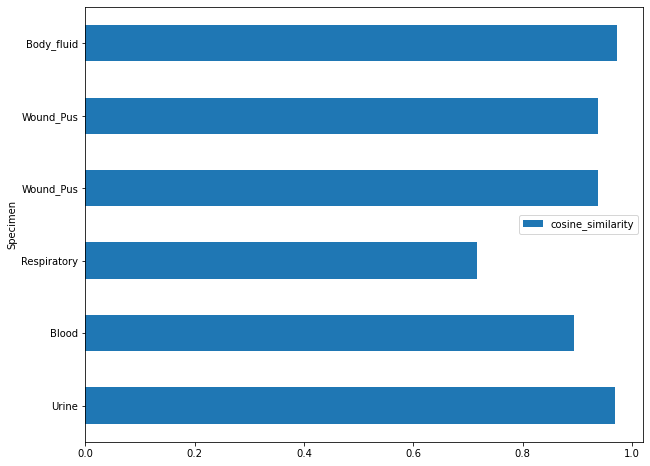

In [204]:
newd.plot.barh(x = 'Specimen')
# plt(figsize=(10, 6), dpi=80)
plt.rcParams["figure.figsize"] = (8,12)
plt.savefig('Specimen_cosine', dpi = 144)

In [191]:
newd

,Specimen,cosine_similarity
0,Urine,0.969173
1,Blood,0.893806
2,Respiratory,0.717065
3,Wound_Pus,0.937173
4,Wound_Pus,0.937173
5,Body_fluid,0.971563
